# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

## IMPORTING LIBRARIES

In [195]:
import pandas as pd
import re
import warnings
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [170]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [204]:
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Exploration and Preprocessing

In [125]:
data=pd.read_csv('blogs.csv')
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [126]:
data.isnull().sum()

Data      0
Labels    0
dtype: int64

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## 	Preprocess the data by cleaning the text 

In [134]:
warnings.simplefilter('ignore')
def clean(x):
    x=x.lower()                                              #converting upper to lower
    x=re.sub('[\.*?/]','',x)                                 #removing terms like ',.\/?*][
    x=re.sub('[%s]'%re.escape(string.punctuation),'',x)      #removing punctuations
    x=re.sub('w*\d\w*','',x)                                 #removing words having numbers in it
    x=re.sub('[0-9]','',x)                                   #removing numbers
    x=re.sub('[''""..,]','',x)                               #removing ''"".,
    return x

cleaned_data=lambda x:clean(x)

In [135]:
data['Data']=data.Data.apply(cleaned_data)
data

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism\npath cantaloupesrvcscmu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc


In [136]:
data['Data']=data['Data'].apply(word_tokenize)    #spliitng the sentsence into tokens
data

,Data,Labels
0,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
1,"[newsgroups, altatheism, path, cantaloupesrvcs...",alt.atheism
2,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",alt.atheism
3,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
4,"[xref, cantaloupesrvcscmuedu, altatheism, talk...",alt.atheism
...,...,...
1995,"[xref, cantaloupesrvcscmuedu, talkabortion, al...",talk.religion.misc
1996,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc
1997,"[xref, cantaloupesrvcscmuedu, talkorigins, tal...",talk.religion.misc
1998,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc


In [138]:
stopword=set(stopwords.words('english'))
data['Data']=data['Data'].apply(lambda tokens:[word for word in tokens if word  not in stopword])
data              #removed stopwords

,Data,Labels
0,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
1,"[newsgroups, altatheism, path, cantaloupesrvcs...",alt.atheism
2,"[path, cantaloupesrvcscmuedudasnewsharvardedun...",alt.atheism
3,"[path, cantaloupesrvcscmuedumagnesiumclubcccmu...",alt.atheism
4,"[xref, cantaloupesrvcscmuedu, altatheism, talk...",alt.atheism
...,...,...
1995,"[xref, cantaloupesrvcscmuedu, talkabortion, al...",talk.religion.misc
1996,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc
1997,"[xref, cantaloupesrvcscmuedu, talkorigins, tal...",talk.religion.misc
1998,"[xref, cantaloupesrvcscmuedu, talkreligionmisc...",talk.religion.misc


## Perform feature extraction using TF-IDF

In [141]:
# Convert the tokenized lists to strings
data['Data'] = [" ".join(doc) for doc in data["Data"]]

tf=TfidfVectorizer()
tfmatrix=tf.fit_transform(data['Data'])

print('TF-IDF MATRIX:','\n',tfmatrix.toarray())
print('COLUMNS NAMES:','\n',tf.get_feature_names_out())

TF-IDF MATRIX: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
COLUMNS NAMES: 
 ['aa' 'aaa' 'aaaaarrrrgh' ... 'zyv' 'zyxel' 'zz']


In [145]:
#converting array into data frame
extraced_data=pd.DataFrame(tfmatrix.toarray(),columns=tf.get_feature_names_out())
extraced_data

,aa,aaa,aaaaarrrrgh,aaboston,aafkhthmj,aalternate,aaltonen,aam,aan,aangegeven,...,zwspbh,zx,zxmkr,zy,zyda,zydacsnpsnavymil,zyehcaspianuscedu,zyv,zyxel,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split the data into training and test sets.

In [156]:
feature=tf.fit_transform(data['Data'])
target=data['Labels']

x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1400, 41354)
(1400,)
(600, 41354)
(600,)


## Implement a Naive Bayes classifier 

In [165]:
model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.43      0.96      0.60        24
           comp.graphics       0.72      0.93      0.81        28
 comp.os.ms-windows.misc       0.97      0.85      0.90        33
comp.sys.ibm.pc.hardware       0.83      0.67      0.74        36
   comp.sys.mac.hardware       1.00      0.64      0.78        36
          comp.windows.x       1.00      0.67      0.80        36
            misc.forsale       0.62      0.83      0.71        24
               rec.autos       0.96      0.87      0.92        31
         rec.motorcycles       0.70      0.95      0.81        22
      rec.sport.baseball       0.97      0.91      0.94        32
        rec.sport.hockey       0.89      1.00      0.94        25
               sci.crypt       0.53      1.00      0.70        24
         sci.electronics       0.76      0.81      0.79        27
                 sci.med       0.95 

## Sentiment Analysis

In [177]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Data'].apply(get_sentiment)
print(data[['Labels', 'Sentiment']])


                  Labels Sentiment
0            alt.atheism  Positive
1            alt.atheism  Negative
2            alt.atheism  Positive
3            alt.atheism  Positive
4            alt.atheism  Positive
...                  ...       ...
1995  talk.religion.misc  Positive
1996  talk.religion.misc  Positive
1997  talk.religion.misc  Positive
1998  talk.religion.misc  Positive
1999  talk.religion.misc  Positive

[2000 rows x 2 columns]


In [179]:
sentiment_distribution = data.groupby('Labels')['Sentiment'].value_counts()
print(sentiment_distribution)

Labels                    Sentiment
alt.atheism               Positive     65
                          Negative     35
comp.graphics             Positive     72
                          Negative     28
comp.os.ms-windows.misc   Positive     77
                          Negative     23
comp.sys.ibm.pc.hardware  Positive     81
                          Negative     19
comp.sys.mac.hardware     Positive     74
                          Negative     26
comp.windows.x            Positive     78
                          Negative     20
                          Neutral       2
misc.forsale              Positive     79
                          Negative     21
rec.autos                 Positive     77
                          Negative     23
rec.motorcycles           Positive     72
                          Negative     28
rec.sport.baseball        Positive     65
                          Negative     35
rec.sport.hockey          Positive     60
                          Negative     4

## WORD CLOUD

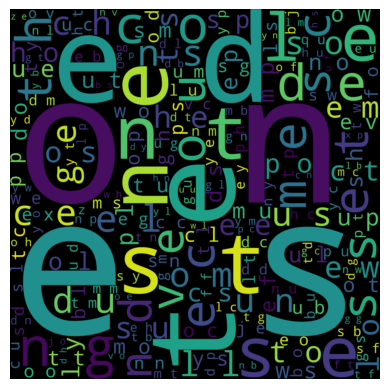

In [200]:
data['Data'] = [" ".join(doc) for doc in data["Data"]]

wordcloud = WordCloud(width=3000, height=3000).generate(" ".join(data['Data']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()